In [1]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
# import transforms
from torchvision import transforms
from PIL import Image



In [2]:
# load jit model
model = torch.jit.load('/workspace/nabang1010/STEAM/LeGiaBach_STEAM/weight/checkpoints_efficientNetB4/efficientNet_b4_jtit_f1_0.924.pt')
model.eval()
model.to('cuda')

RecursiveScriptModule(
  original_name=Model_classify
  (model_backbone): RecursiveScriptModule(
    original_name=EfficientNet
    (features): RecursiveScriptModule(
      original_name=Sequential
      (0): RecursiveScriptModule(
        original_name=Conv2dNormActivation
        (0): RecursiveScriptModule(original_name=Conv2d)
        (1): RecursiveScriptModule(original_name=BatchNorm2d)
        (2): RecursiveScriptModule(original_name=SiLU)
      )
      (1): RecursiveScriptModule(
        original_name=Sequential
        (0): RecursiveScriptModule(
          original_name=MBConv
          (block): RecursiveScriptModule(
            original_name=Sequential
            (0): RecursiveScriptModule(
              original_name=Conv2dNormActivation
              (0): RecursiveScriptModule(original_name=Conv2d)
              (1): RecursiveScriptModule(original_name=BatchNorm2d)
              (2): RecursiveScriptModule(original_name=SiLU)
            )
            (1): RecursiveScriptMod

In [3]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
transform_test = transforms.Compose([ transforms.Resize((224,224)),transforms.ToTensor(),normalize])



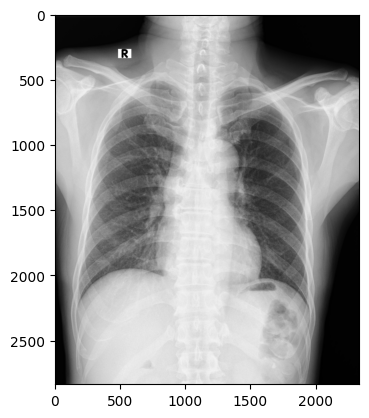

1


In [4]:
img_path = "/workspace/nabang1010/STEAM/LeGiaBach_STEAM/DATA/dataset/test_png/788c42c6b87bb62f1d5def6b0e7ca9da.png"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img = Image.fromarray(img)
img = transform_test(img)
img = img.unsqueeze(0)
img = img.to('cuda')
output = model(img)
# get label from output
_, predicted = torch.max(output.data, 1)
print(predicted.item())

